# 2D project DDW report

In [ ]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import math
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel(f"2D dataset.xlsx")
df = df.drop(["Country Code", "temperature change per country in 2022", "ideal temperature?"], axis = 1)

In [ ]:
df.head()

,Country,Agricultural Land( %),Co2-Emissions per ton,CPI,GDP,Population,Infant mortality,Minimum wage,Unemployment rate,Population: Labor force participation (%),temperature,Precipitation Depth (mm/year),Gini's index,GDP per capita,Human Development Index (2021),Prevalence of moderate or severe food insecurity in the total population (percent) (2022)
0,Afghanistan,0.581,8672.0,149.90,1.910135e+10,38041754.0,47.9,0.43,0.1112,0.489,NaN,327.0,NaN,502.115487,0.478,82.6
1,Albania,0.431,4536.0,119.05,1.527808e+10,2854191.0,7.8,1.12,0.1233,0.557,15.97,1485.0,29.4,5352.857411,0.796,33.1
2,Algeria,0.174,150006.0,151.36,1.699882e+11,43053054.0,20.1,0.95,0.1170,0.412,26.30,89.0,27.6,3948.343279,0.745,22.6
3,Andorra,0.400,469.0,NaN,3.154058e+09,77142.0,2.7,6.63,NaN,NaN,NaN,NaN,NaN,40886.391162,0.858,NaN
4,Angola,0.475,34693.0,261.73,9.463542e+10,31825295.0,51.6,0.71,0.0689,0.775,26.69,1010.0,51.3,2973.591160,0.586,79.9


In [ ]:
print("Imputing...")
imp = IterativeImputer(max_iter=1000, random_state=0)
# df2 = df.fillna(df.iloc[:,1:].mean(numeric_only = False))
df_imp = imp.fit_transform(df.iloc[:,1:])
df_imp = pd.DataFrame(df_imp)
#print(df_imp.columns, df.columns)
df_imp.columns = df.iloc[:,1:].columns
#print(df_imp)
print("Imputed!")


Imputing...
Imputed!


In [ ]:
df_imp["Country"] = df.loc[:, ["Country"]]

df_country_name = df_imp["Country"]
df_without_country_name = df_imp.drop(["Country"], axis = 1)

In [ ]:
pd.DataFrame(df_without_country_name)

,Agricultural Land( %),Co2-Emissions per ton,CPI,GDP,Population,Infant mortality,Minimum wage,Unemployment rate,Population: Labor force participation (%),temperature,Precipitation Depth (mm/year),Gini's index,GDP per capita,Human Development Index (2021),Prevalence of moderate or severe food insecurity in the total population (percent) (2022)
0,0.581,8672.0,149.900000,1.910135e+10,38041754.0,47.9,0.43000,0.111200,0.489000,26.322551,327.000000,41.813372,502.115487,0.478,82.600000
1,0.431,4536.0,119.050000,1.527808e+10,2854191.0,7.8,1.12000,0.123300,0.557000,15.970000,1485.000000,29.400000,5352.857411,0.796,33.100000
2,0.174,150006.0,151.360000,1.699882e+11,43053054.0,20.1,0.95000,0.117000,0.412000,26.300000,89.000000,27.600000,3948.343279,0.745,22.600000
3,0.400,469.0,182.314266,3.154058e+09,77142.0,2.7,6.63000,0.051105,0.641294,15.216309,1165.978469,33.125272,40886.391162,0.858,13.600201
4,0.475,34693.0,261.730000,9.463542e+10,31825295.0,51.6,0.71000,0.068900,0.775000,26.690000,1010.000000,51.300000,2973.591160,0.586,79.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.245,164175.0,2740.270000,4.823593e+11,28515829.0,21.4,0.01000,0.088000,0.597000,32.167624,2044.000000,39.473927,16915.493453,0.691,42.946603
191,0.393,192668.0,163.520000,2.619212e+11,96462106.0,16.5,0.73000,0.020100,0.774000,24.660000,1821.000000,36.800000,2715.276036,0.703,10.000000
192,0.446,10609.0,157.580000,2.691440e+10,29161922.0,42.9,1.06537,0.129100,0.380000,24.062240,167.000000,36.700000,922.929642,0.455,71.200000
193,0.321,5141.0,212.310000,2.306472e+10,17861030.0,40.4,0.24000,0.114300,0.746000,26.750000,1020.000000,55.900000,1291.343357,0.565,76.000000


In [ ]:
meansVector = df_without_country_name.mean()
stdsVector = df_without_country_name.std()
df_without_country_name_norm = (df_without_country_name - df_without_country_name.mean()) / df_without_country_name.std()

In [ ]:
targetDf = df_without_country_name_norm["Prevalence of moderate or severe food insecurity in the total population (percent) (2022)"]

In [ ]:
featureDf = df_without_country_name_norm.drop(["Prevalence of moderate or severe food insecurity in the total population (percent) (2022)"], axis = 1)

In [ ]:
def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    if random_state != None:
        np.random.seed(random_state)

    indices = df_feature.index
    testsz = int(test_size*len(indices))
    test_indices = sorted(np.random.choice(indices, testsz, replace = False))
    training_indices = list(set(indices) - set(test_indices))
    df_feature_train = df_feature.loc[training_indices]
    df_target_train = df_target.loc[training_indices]
    df_feature_test = df_feature.loc[test_indices]
    df_target_test = df_target.loc[test_indices]
    return df_feature_train, df_feature_test, df_target_train, df_target_test


In [ ]:
def prepare_feature(df_feature):
    if isinstance(df_feature, pd.DataFrame):
        x = df_feature.to_numpy()
    else:
        x = df_feature
    x.T
    x1 = np.insert(x, 0, 1, axis=1)
    return x1

def prepare_target(df_target):
    if isinstance(df_target, pd.DataFrame):
        x = df_target.to_numpy()
    else:
        x = df_target
    x.T
    return x

In [ ]:
xTrain, xTest, yTrain, yTest = split_data(featureDf, targetDf, random_state=100, test_size=0.2)

In [ ]:
def normalize_z(dfin, columns_means=None, columns_stds=None):
    if columns_means == None:
        columns_means = dfin.mean()
    if columns_stds == None:
        columns_stds = dfin.std()
    dfout = (dfin-columns_means)/columns_stds
    return dfout, columns_means, columns_stds

def predict_linreg(df_feature, beta, means=None, stds=None):
    x = normalize_z(df_feature, means, stds)
    prepared_df = prepare_feature(x[0])
    return calc_linreg(prepared_df, beta)

def calc_linreg(X, beta):
    return np.matmul(X,beta)

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    if random_state != None:
        np.random.seed(random_state)

    indices = df_feature.index
    testsz = int(test_size*len(indices))
    test_indices = sorted(np.random.choice(indices, testsz, replace = False))
    training_indices = list(set(indices) - set(test_indices))
    df_feature_train = df_feature.loc[training_indices]
    df_target_train = df_target.loc[training_indices]
    df_feature_test = df_feature.loc[test_indices]
    df_target_test = df_target.loc[test_indices]
    return df_feature_train, df_feature_test, df_target_train, df_target_test

def r2_score(y, ypred):
    return 1 - (np.sum((y - ypred)**2)/np.sum((y - np.mean(y))**2))

def mean_squared_error(target, pred):
    return np.mean((target - pred)**2)

def compute_cost_linreg(X, y, beta):
    J = 0
    m = X.shape[0]
    for i in range(m):
        J = J + 1/(2*m)*(calc_linreg(X[i],beta) - y[i])**2
    return J

def gradient_descent_linreg(X, y, beta, alpha, num_iters):
    m = y.shape[0]
    J_storage = np.zeros(num_iters)
    for i in range(num_iters):
        J_storage[i] = compute_cost_linreg(X, y, beta)
        beta = beta - (alpha/m)*np.matmul(X.T, calc_linreg(X,beta)-y) #np.matmul is derivative, divide by m to find average
    return beta, J_storage

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xTrain, yTrain)
model.score(xTrain, yTrain)

0.9029015408489117

In [ ]:
predictions = model.predict(xTest)
mean_squared_error(yTest, predictions)

0.09697684805600251

In [ ]:
print(model.coef_)
print(model.intercept_)

[-0.03786463 -0.23205834  0.00092507  0.21683189 -0.39742499  0.36926921
  0.0452096  -0.04873517 -0.00751045  0.09419779 -0.02566469  0.19807632
 -0.14113578 -0.2808422 ]
0.010865696464112007


In [ ]:
pd.DataFrame({'preds': predictions, 'actuals': yTest})

,preds,actuals
11,-0.444985,-0.478803
15,-0.853686,-0.867076
31,1.299505,0.999909
32,-1.068419,-0.940245
41,-0.712994,-0.814397
46,-1.185240,-0.915775
59,-1.208604,-0.709524
64,-0.959267,-1.031135
73,0.353163,0.349538
81,-1.189981,-0.989186


In [ ]:
bestPredictors = pd.DataFrame({"predictors": xTrain.columns, "coefs": model.coef_})
bestPredictors["coefs_abs"] = bestPredictors["coefs"].abs()
bestPredictors = bestPredictors.sort_values("coefs_abs", ascending = False)
bestPredictors = bestPredictors.drop(["coefs_abs"], axis = 1)
bestPredictors

,predictors,coefs
4,Population,-0.397425
5,Infant mortality,0.369269
13,Human Development Index (2021),-0.280842
1,Co2-Emissions per ton,-0.232058
3,GDP,0.216832
11,Gini's index,0.198076
12,GDP per capita,-0.141136
9,temperature,0.094198
7,Unemployment rate,-0.048735
6,Minimum wage,0.045210


# Making the best possible model

In [ ]:
df_without_country_name_better = df_without_country_name.drop(["temperature", "Unemployment rate", "Minimum wage", "Agricultural Land( %)", "Precipitation Depth (mm/year)", "Population: Labor force participation (%)", "CPI", "GDP per capita"], axis = 1)
df_without_country_name_better

,Co2-Emissions per ton,GDP,Population,Infant mortality,Gini's index,Human Development Index (2021),Prevalence of moderate or severe food insecurity in the total population (percent) (2022)
0,8672.0,1.910135e+10,38041754.0,47.9,41.813372,0.478,82.600000
1,4536.0,1.527808e+10,2854191.0,7.8,29.400000,0.796,33.100000
2,150006.0,1.699882e+11,43053054.0,20.1,27.600000,0.745,22.600000
3,469.0,3.154058e+09,77142.0,2.7,33.125272,0.858,13.600201
4,34693.0,9.463542e+10,31825295.0,51.6,51.300000,0.586,79.900000
...,...,...,...,...,...,...,...
190,164175.0,4.823593e+11,28515829.0,21.4,39.473927,0.691,42.946603
191,192668.0,2.619212e+11,96462106.0,16.5,36.800000,0.703,10.000000
192,10609.0,2.691440e+10,29161922.0,42.9,36.700000,0.455,71.200000
193,5141.0,2.306472e+10,17861030.0,40.4,55.900000,0.565,76.000000


In [ ]:
betterMeansVector = df_without_country_name_better.mean()
betterStdsVector = df_without_country_name_better.std()
df_without_country_name_better_norm = (df_without_country_name_better - df_without_country_name_better.mean()) / df_without_country_name_better.std()
betterTargetDf = df_without_country_name_better_norm["Prevalence of moderate or severe food insecurity in the total population (percent) (2022)"]
betterFeatureDf = df_without_country_name_better_norm.drop(["Prevalence of moderate or severe food insecurity in the total population (percent) (2022)"], axis = 1)
xTrain, xTest, yTrain, yTest = split_data(betterFeatureDf, betterTargetDf, random_state=42, test_size=0.3)

In [ ]:
import itertools

def all_combinations(lst):
    # List to store all combinations
    comb_list = []

    # Generate combinations for all lengths
    for r in range(1, len(lst) + 1):
        comb_list.extend(itertools.combinations(lst, r))

    return comb_list

# Example usage
combinations = all_combinations(df_without_country_name_better.columns)
len(combinations)

127

In [ ]:
import scipy.stats as stats

def calculate_p_values(model, X, y):
    params = np.append(model.intercept_, model.coef_)
    predictions = model.predict(X)

    newX = np.append(np.ones((len(X), 1)), X, axis=1)
    MSE = (sum((y - predictions)**2)) / (len(newX) - len(newX[0]))

    var_b = MSE * (np.linalg.inv(np.dot(newX.T, newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params / sd_b

    p_values = [2 * (1 - stats.t.cdf(np.abs(i), (len(newX) - 1))) for i in ts_b]

    return p_values

In [ ]:
def gridSearch(xTrain, xTest, yTrain, yTest):
  allCombs = all_combinations(xTrain.columns)
  bestModelCoefs = []
  bestError = 10000000
  # i = 0
  print(len(allCombs))
  for comb in allCombs:
    # i += 1
    # print(i)
    currXTrain = xTrain[list(comb)]
    currXTest = xTest[list(comb)]
    currModel = LinearRegression()
    currModel.fit(currXTrain, yTrain)
    # model.score(xTrain, yTrain)
    predictions = currModel.predict(currXTest)
    currError = mean_squared_error(yTest, predictions)
    if currError < bestError:
      print(currError)
      bestError = currError
      bestModelCoefs = currModel.coef_

    # print(calculate_p_values(currModel, currXTrain, yTrain))
    # break
  return bestModelCoefs, bestError

bestModelCoefs, bestError = gridSearch(xTrain, xTest, yTrain, yTest)

63
0.7987791384550604
0.7715804359903535
0.16828204749225034
0.10846248556263341
0.10381977039540183
0.09165640020822564
0.09019887906684025
0.0784062185517275
0.07663277023804259
0.06350140459348431
0.06294078495746813


In [ ]:
bestPredictors = pd.DataFrame({"predictors": xTrain.columns[0 : len(bestModelCoefs)], "coefs": bestModelCoefs})
bestPredictors["coefs_abs"] = bestPredictors["coefs"].abs()
bestPredictors = bestPredictors.sort_values("coefs_abs", ascending = False)
bestPredictors = bestPredictors.drop(["coefs_abs"], axis = 1)
bestPredictors

,predictors,coefs
1,GDP,-0.469500
2,Population,0.424484
4,Gini's index,-0.318210
3,Infant mortality,0.224977
0,Co2-Emissions per ton,0.016248


Gini's index


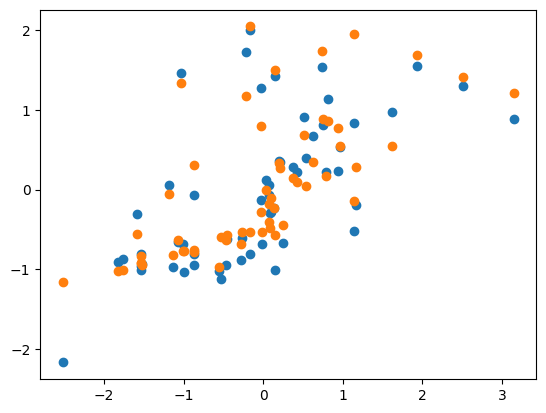

In [ ]:
xrain, xest, yrain, yest = split_data(betterFeatureDf[bestPredictors['predictors']], betterTargetDf, random_state=42, test_size=0.3)
best_model = LinearRegression()
best_model.fit(xrain, yrain)
redictions = best_model.predict(xest)
x_axis = betterFeatureDf[bestPredictors].columns[4]
print(x_axis)
plt.scatter(xest[x_axis], yest)
plt.scatter(xest[x_axis], redictions)

In [ ]:
from sklearn.model_selection import cross_validate

def gridSearch(xTrain, xTest, yTrain, yTest, entireX, entireY):
  allCombs = all_combinations(xTrain.columns)
  bestModelCoefs = []
  bestError = 10000000
  # i = 0
  print(len(allCombs))
  for comb in allCombs:
    # i += 1
    # print(i)
    currEntireX = entireX[list(comb)]
    currXTrain = xTrain[list(comb)]
    currXTest = xTest[list(comb)]
    currModel = LinearRegression()
    currModel.fit(currXTrain, yTrain)
    # model.score(xTrain, yTrain)
    # predictions = currModel.predict(currXTest)
    # currError = mean_squared_error(yTest, predictions)
    currCrossVal = cross_validate(currModel, currEntireX, entireY, cv=10, scoring="neg_mean_squared_error", return_train_score = True)
    currMeanError = - sum(currCrossVal["test_score"]) / len(currCrossVal["test_score"])
    if currMeanError < bestError:
      print(currMeanError)
      bestError = currMeanError
      bestModelCoefs = currModel.coef_

    # print(calculate_p_values(currModel, currXTrain, yTrain))
    # break
  return bestModelCoefs, bestError

bestModelCoefs, bestError = gridSearch(xTrain, xTest, yTrain, yTest, betterFeatureDf, betterTargetDf)

63
0.7983618583649267
0.40087198176866
0.3904755520976896
0.27930465393375953
0.20219687879002518
0.1900562826028586
0.15054391137673465
0.12838714436796567
0.1269925537039237


In [ ]:
bestPredictors = pd.DataFrame({"predictors": xTrain.columns[0 : len(bestModelCoefs)], "coefs": bestModelCoefs})
bestPredictors["coefs_abs"] = bestPredictors["coefs"].abs()
bestPredictors = bestPredictors.sort_values("coefs_abs", ascending = False)
bestPredictors = bestPredictors.drop(["coefs_abs"], axis = 1)
bestPredictors

,predictors,coefs
3,Infant mortality,0.396937
2,Population,-0.362333
5,Human Development Index (2021),-0.339610
0,Co2-Emissions per ton,-0.282759
4,Gini's index,0.227261
1,GDP,0.211315


# Testing ALLLLLLLL Combinations

In [ ]:
df_without_country_name_better = df_without_country_name

In [ ]:
betterMeansVector = df_without_country_name_better.mean()
betterStdsVector = df_without_country_name_better.std()
df_without_country_name_better_norm = (df_without_country_name_better - df_without_country_name_better.mean()) / df_without_country_name_better.std()
betterTargetDf = df_without_country_name_better_norm["Prevalence of moderate or severe food insecurity in the total population (percent) (2022)"]
betterFeatureDf = df_without_country_name_better_norm.drop(["Prevalence of moderate or severe food insecurity in the total population (percent) (2022)"], axis = 1)
xTrain, xTest, yTrain, yTest = split_data(betterFeatureDf, betterTargetDf, random_state=42, test_size=0.3)

In [ ]:
from sklearn.model_selection import cross_validate

def gridSearch(xTrain, xTest, yTrain, yTest, entireX, entireY):
  allCombs = all_combinations(xTrain.columns)
  bestModelCoefs = []
  bestError = 10000000
  i = 0
  print(len(allCombs))
  for comb in allCombs:
    i += 1
    print(i)
    currEntireX = entireX[list(comb)]
    currXTrain = xTrain[list(comb)]
    currXTest = xTest[list(comb)]
    currModel = LinearRegression()
    currModel.fit(currXTrain, yTrain)
    # model.score(xTrain, yTrain)
    # predictions = currModel.predict(currXTest)
    # currError = mean_squared_error(yTest, predictions)
    currCrossVal = cross_validate(currModel, currEntireX, entireY, cv=10, scoring="neg_mean_squared_error", return_train_score = True)
    currMeanError = - sum(currCrossVal["test_score"]) / len(currCrossVal["test_score"])
    if currMeanError < bestError:
      print(currMeanError)
      bestError = currMeanError
      bestModelCoefs = currModel.coef_

    # print(calculate_p_values(currModel, currXTrain, yTrain))
    # break
  return bestModelCoefs, bestError

bestModelCoefs, bestError = gridSearch(xTrain, xTest, yTrain, yTest, betterFeatureDf, betterTargetDf)

Streaming output truncated to the last 5000 lines.
11386
11387
11388
11389
11390
11391
11392
11393
11394
11395
11396
11397
11398
11399
11400
11401
11402
11403
11404
11405
11406
11407
11408
11409
11410
11411
11412
11413
11414
11415
11416
11417
11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
1

In [ ]:
bestPredictors = pd.DataFrame({"predictors": xTrain.columns[0 : len(bestModelCoefs)], "coefs": bestModelCoefs})
bestPredictors["coefs_abs"] = bestPredictors["coefs"].abs()
bestPredictors = bestPredictors.sort_values("coefs_abs", ascending = False)
bestPredictors = bestPredictors.drop(["coefs_abs"], axis = 1)
bestPredictors

,predictors,coefs
3,GDP,0.406926
2,CPI,-0.390648
8,Population: Labor force participation (%),-0.238563
0,Agricultural Land( %),-0.238312
1,Co2-Emissions per ton,0.217383
6,Minimum wage,0.189590
7,Unemployment rate,-0.099481
5,Infant mortality,0.090953
4,Population,-0.019131


In [ ]:
bestError

0.11782597901192796

GDP


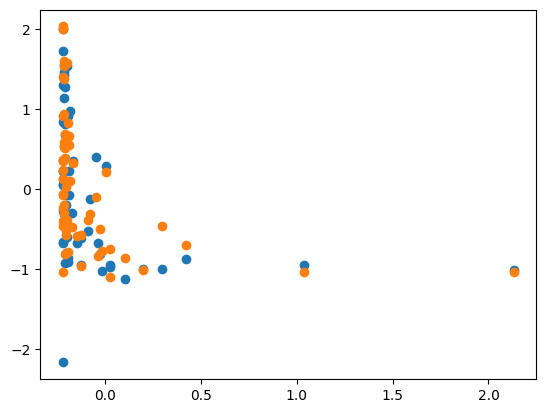

In [ ]:
xrain, xest, yrain, yest = split_data(betterFeatureDf[bestPredictors['predictors']], betterTargetDf, random_state=42, test_size=0.3)
best_model = LinearRegression()
best_model.fit(xrain, yrain)
redictions = best_model.predict(xest)
x_axis = betterFeatureDf[bestPredictors].columns[3]
print(x_axis)
plt.scatter(xest[x_axis], yest)
plt.scatter(xest[x_axis], redictions)

In [ ]:
kenya = df_without_country_name_better_norm.iloc[[88]]
kenya

,Agricultural Land( %),Co2-Emissions per ton,CPI,GDP,Population,Infant mortality,Minimum wage,Unemployment rate,Population: Labor force participation (%),temperature,Precipitation Depth (mm/year),Gini's index,GDP per capita,Human Development Index (2021),Prevalence of moderate or severe food insecurity in the total population (percent) (2022)
88,0.440442,-0.186242,-0.02542,-0.175804,0.085584,0.482986,-0.6871,-0.805373,1.139785,0.519776,-0.702173,0.259592,-0.548085,-0.939804,1.363469


In [ ]:
kenya = pd.DataFrame(kenya[['GDP', 'CPI', 'Population: Labor force participation (%)',
       'Agricultural Land( %)', 'Co2-Emissions per ton', 'Minimum wage',
       'Unemployment rate', 'Infant mortality', 'Population']])
kenya

,GDP,CPI,Population: Labor force participation (%),Agricultural Land( %),Co2-Emissions per ton,Minimum wage,Unemployment rate,Infant mortality,Population
88,-0.175804,-0.02542,1.139785,0.440442,-0.186242,-0.6871,-0.805373,0.482986,0.085584


In [ ]:
best_model.feature_names_in_

array(['GDP', 'CPI', 'Population: Labor force participation (%)',
       'Agricultural Land( %)', 'Co2-Emissions per ton', 'Minimum wage',
       'Unemployment rate', 'Infant mortality', 'Population'],
      dtype=object)

In [ ]:
kenyaPred = best_model.predict(kenya)


In [ ]:
kenyaMean = df["Prevalence of moderate or severe food insecurity in the total population (percent) (2022)"].mean()

In [ ]:
kenyaStd = df["Prevalence of moderate or severe food insecurity in the total population (percent) (2022)"].std()

In [ ]:
kenyaPred * kenyaStd + kenyaMean

array([49.43934146])

In [ ]:
df.iloc[[88]].T

,88
Country,Kenya
Agricultural Land( %),0.485
Co2-Emissions per ton,17910.0
CPI,180.51
GDP,95503088538.0
Population,52573973.0
Infant mortality,30.6
Minimum wage,0.25
Unemployment rate,0.0264
Population: Labor force participation (%),0.747
